<a href="https://colab.research.google.com/github/ansh27ika/car-price-predictor-/blob/main/car_price_predictor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## car price prediction 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
%matplotlib inline
mpl.style.use('ggplot')

#Using ggplot in Python allows you to build data visualizations
#in a very concise and consistent way

In [6]:
datasetPath = '/content/drive/MyDrive/datasets/quikr_car .csv'
car = pd.read_csv(datasetPath)

In [7]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [8]:
car.tail()

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [10]:
car.shape

(892, 6)

In [11]:
#creating a backup copy 
backup = car.copy()

# Quality
## names are pretty inconsistent
# names have company names attached to it
# some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
# company: many of the names are not of any company like 'Used', 'URJENT', and so on.
# year has many non-year values
# year is in object. Change to integer
# Price has Ask for Price
# Price has commas in its prices and is in object
# kms_driven has object values with kms at last.
# It has nan values and two rows have 'Petrol' in them
# fuel_type has nan values

# ****cleannig data 

In [12]:
# year has many non year values
# converting into numeric values
car = car[car['year'].str.isnumeric()]

In [13]:
# year is in object change it to integer
car['year'] = car['year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#price has ask for price
car=car[car['Price']!='Ask For Price']

In [15]:
# price has commas in its price and is in object 
car['Price'] = car['Price'].str.replace(',','').astype(int)

In [16]:
# kms_driven has object values  with kms at last
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')


In [17]:
## it has nan values  and two  2 rows have petrol in them 
car=car[car['kms_driven'].str.isnumeric()]
# isnumeric() method returns True if all the characters are numeric (0-9), otherwise False

In [18]:
car['kms_driven']=car['kms_driven'].astype(int)

In [19]:
## fuel type has nan values

car=car[~car['fuel_type'].isna()]

In [20]:
car.shape

(816, 6)

In [21]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [22]:
# reseting the index of the final cleaned data

In [23]:
car = car.reset_index(drop=True)

## cleaned data 

In [24]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [25]:
car.to_csv('cleaned_Car_data.csv')

In [26]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [27]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


## checking the relationship of comapny with price

In [28]:
car = car[car['Price']<6000000]

In [29]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [30]:
import seaborn as sns 

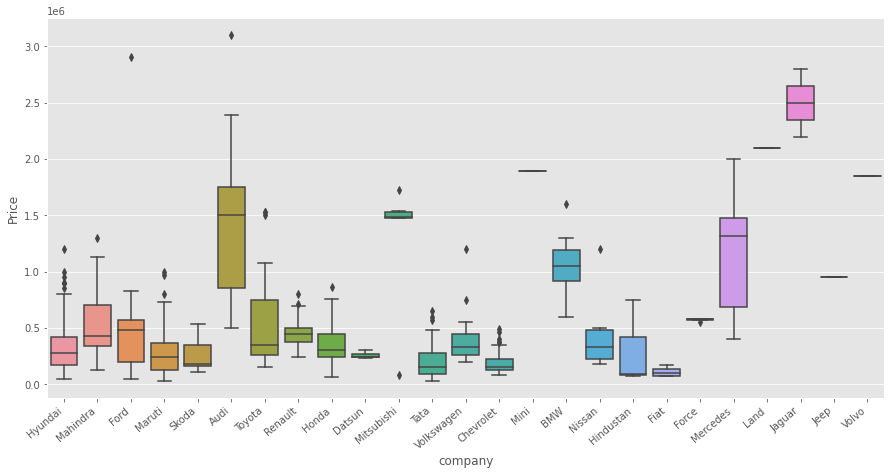

In [31]:

plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

## checking relationship of year with price 

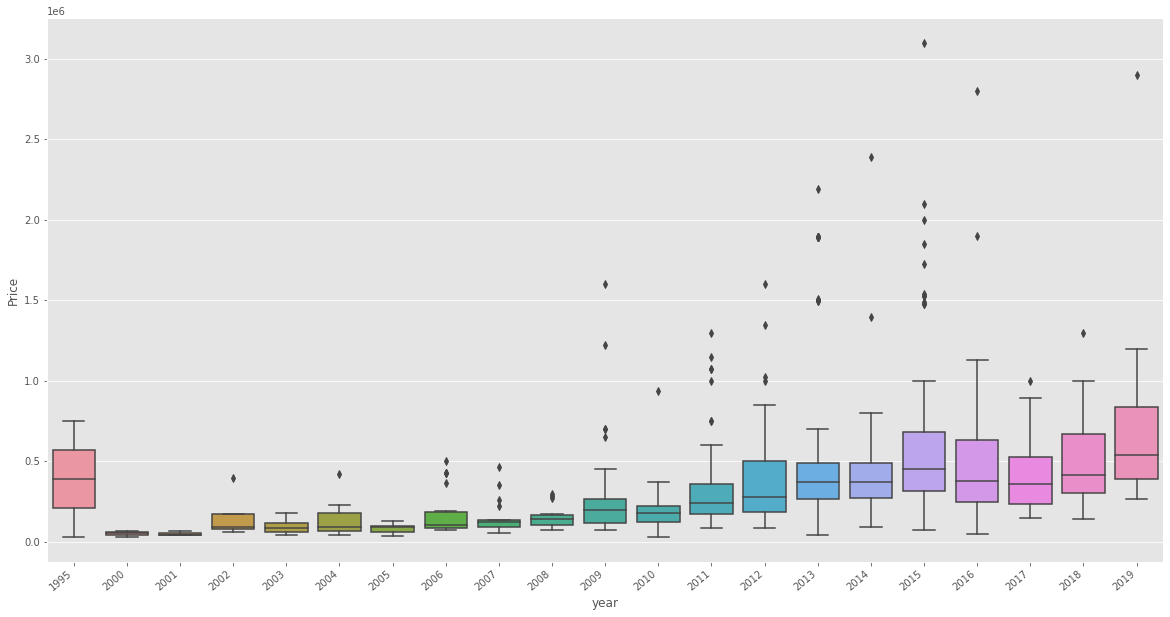

In [32]:

plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

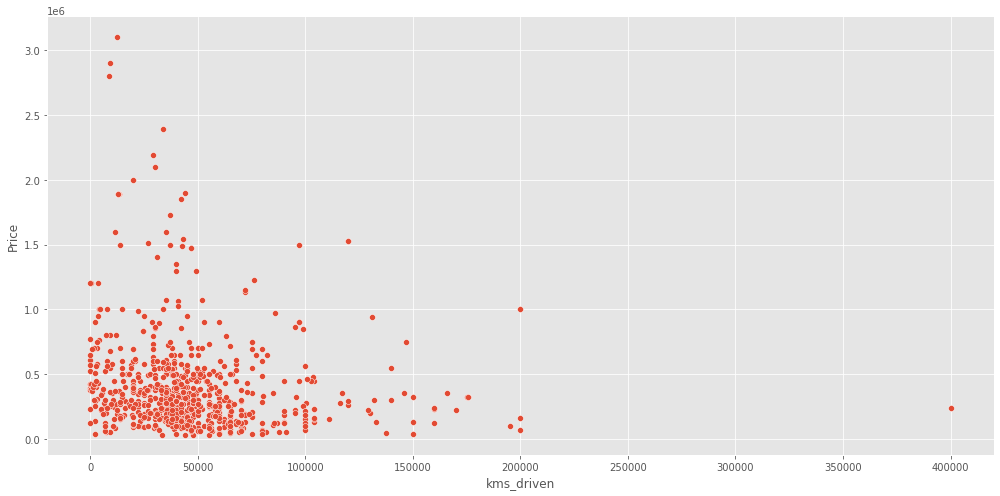

In [33]:
## checking the relationshiop of kms_driven with price
sns.relplot(x='kms_driven',y='Price',data=car,
            height = 7 , aspect=2)

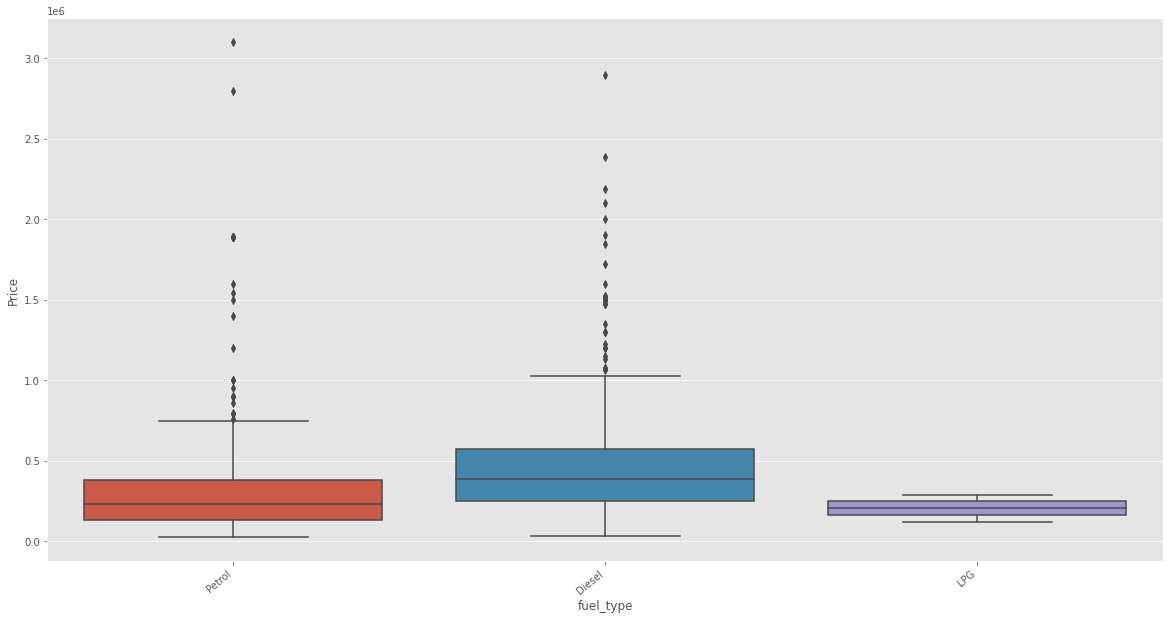

In [34]:
## checking the relationship of fuel type with price
plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='fuel_type',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

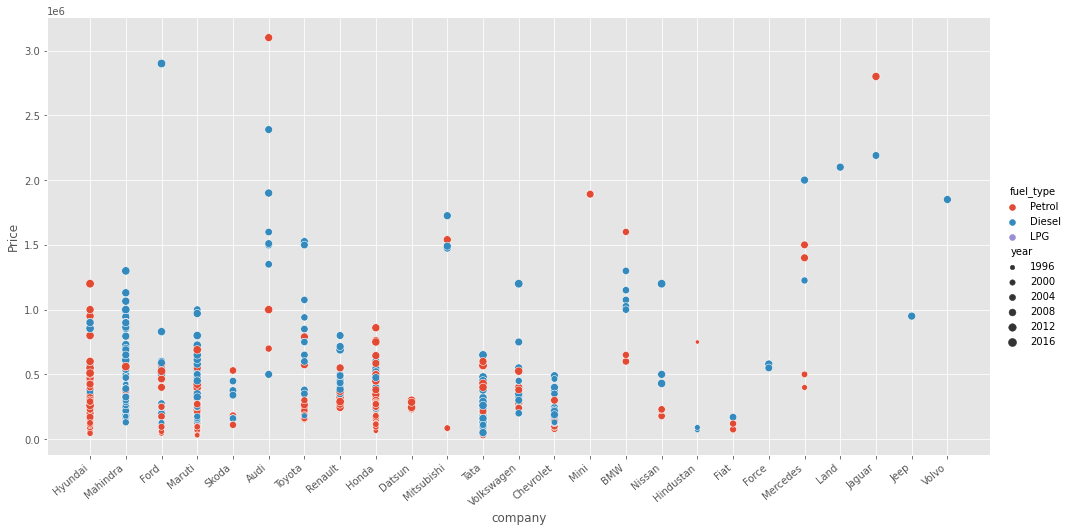

In [35]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

## extracting training data

In [36]:
datasetPath = '/content/drive/MyDrive/datasets/cleaned_Car_data.csv'
car = pd.read_csv(datasetPath)
x=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [37]:
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [38]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 816, dtype: int64

In [39]:
y.shape

(816,)

## applying train test split

In [40]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test= train_test_split(x,y,test_size=0.2)

## creating an one hot encoder

In [41]:
def preprocess_and_create_pipeline(global_x_feat,features = ['name','company','fuel_type']):
    encoder = OneHotEncoder()
    encoder.fit(global_x_feat[features])
    column_trans = make_column_transformer((OneHotEncoder(categories=encoder.categories_),features),remainder='passthrough')
    lr = LinearRegression()
    return make_pipeline(column_trans,lr)

# creating a column transformer to transform categorical columns 

# linear regression model 

In [42]:
pipeline = preprocess_and_create_pipeline(x)

In [43]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [44]:
y_pred = pipeline.predict(x_test)

## checking r2 score 

In [45]:
r2_score(y_test, y_pred)

0.6513097012981026

In [46]:
import pickle
pickle.dump(pipeline,open('LinearRegressionModel.pkl','wb'))

In [47]:
pipeline.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))


array([422767.70484217])

In [48]:
pipeline.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

In [49]:
json = {'name': 'Audi A4 1.8', 'company': 'Audi', 'year': 2009, 'kms_driven': 47000, 'fuel_type': 'Petrol'}

In [50]:
input = pd.DataFrame(json, index=[0])

In [51]:
pipeline.predict(input)

array([707374.4416201])